In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model import BB_Model
from project_utils.feature_stats import Feature_Statistics
from project_utils.feature_stats import Classes_Container


In [2]:
# Load Diabetes model

Diabetes_Data = BB_Model('Diabetes')

Diabetes_Data.df().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
Diabetes_Data.MPL()

0.7207792207792207


MLPClassifier(random_state=RandomState(MT19937) at 0x1200EF31C40)

In [4]:
Diabetes_Data.Random_Forest()

0.7142857142857143


RandomForestClassifier(random_state=RandomState(MT19937) at 0x1200EF31C40)

In [5]:
print(Diabetes_Data.get_features())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [6]:
#Default settings
from unravel.tabular import UnRAVELTabularExplainer

X_train, X_test, y_train, y_test = Diabetes_Data.get_TT_data()

#Initializing the explainer object
Unravel_Exp = UnRAVELTabularExplainer(bbox_model           = Diabetes_Data.get_Random_Forest(),
                                      train_data           = X_train,
                                      categorical_features = Diabetes_Data.get_catagorical(),
                                      mode                 = Diabetes_Data.get_mode())       
        


warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


In [7]:
# Generate explantion data for Random Forest

Diabetes_Stats = Feature_Statistics(feature_names = Diabetes_Data.get_features(), mode='classification', classes=Diabetes_Data.get_classes())

for test_instance in range(20):#X_test.shape[0]):

    data_row  = np.array([X_test[test_instance]])
    
    explain_inst = Unravel_Exp.explain(X_init            = data_row,
                                       feature_names     = Diabetes_Data.get_features(),
                                       alpha             = "FUR",
                                       max_iter          = 20,
                                       normalize         = False,
                                       importance_method = "ARD")
           
    f_predict = Diabetes_Data.get_Random_Forest().predict_proba(data_row.reshape(1, -1))

    e_predict = Unravel_Exp.gpmodel_predict(data_row)
    
    e_predict = np.array(e_predict).ravel()

    print('INSTANCE: ', test_instance)
    
    Diabetes_Stats.Add_Sample(sample       = data_row,
                              outcome      = y_test[test_instance],
                              f_prediction = f_predict,
                              e_prediction = e_predict)


INSTANCE:  0
INSTANCE:  1
INSTANCE:  2
INSTANCE:  3
INSTANCE:  4
INSTANCE:  5
INSTANCE:  6
INSTANCE:  7
INSTANCE:  8
INSTANCE:  9
INSTANCE:  10
INSTANCE:  11
INSTANCE:  12
INSTANCE:  13
INSTANCE:  14
INSTANCE:  15
INSTANCE:  16
INSTANCE:  17
INSTANCE:  18
INSTANCE:  19


In [8]:
Diabetes_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.075)

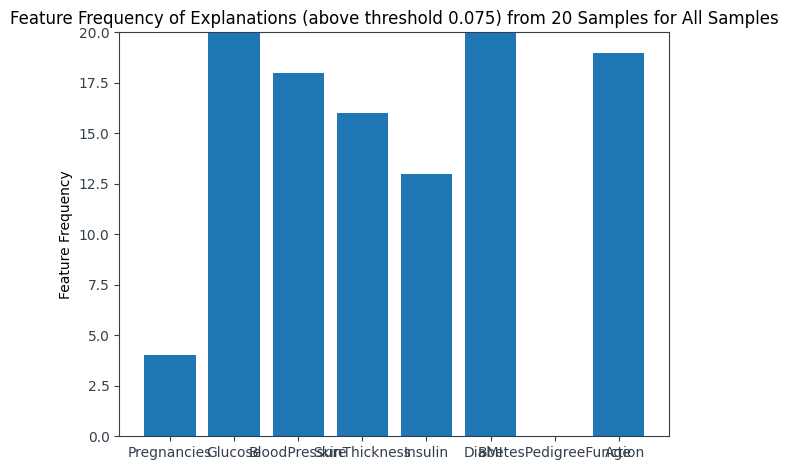

In [9]:
Diabetes_Stats.Frequency_Plot()

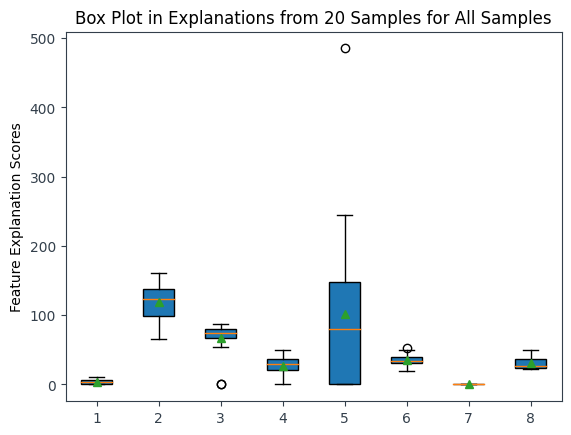

1 -      Pregnancies
2 -      Glucose
3 -      BloodPressure
4 -      SkinThickness
5 -      Insulin
6 -      BMI
7 -      DiabetesPedigreeFunction
8 -      Age


In [10]:
Diabetes_Stats.Box_Plot()

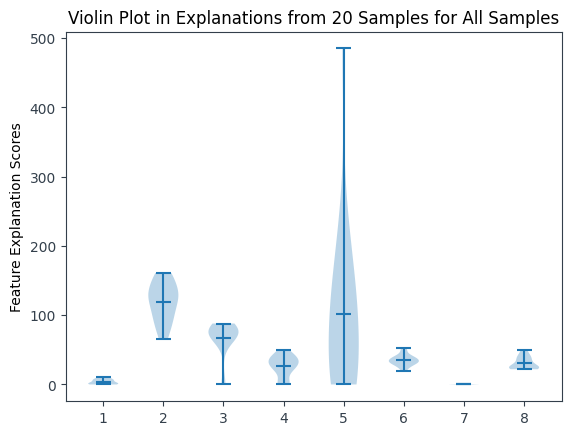

1 -      Pregnancies
2 -      Glucose
3 -      BloodPressure
4 -      SkinThickness
5 -      Insulin
6 -      BMI
7 -      DiabetesPedigreeFunction
8 -      Age


In [11]:
Diabetes_Stats.Violin_Plot(top_features=False)

In [12]:
Diabetes_Container = Classes_Container(Diabetes_Stats)

Diabetes_Container.Feature_Counts(max_features=11, scaled=True, threshold=0.1)


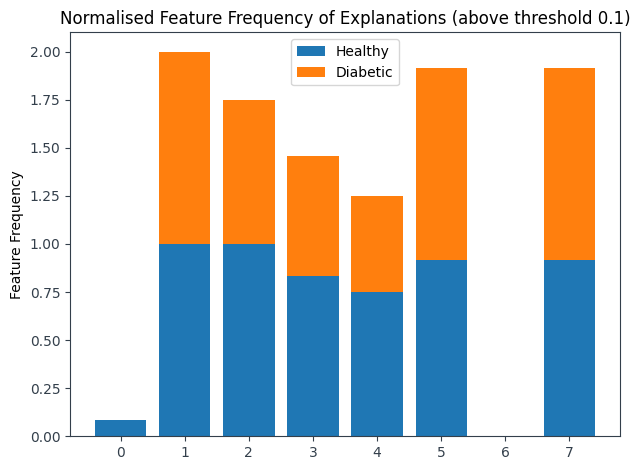

0 -      Pregnancies
1 -      Glucose
2 -      BloodPressure
3 -      SkinThickness
4 -      Insulin
5 -      BMI
6 -      DiabetesPedigreeFunction
7 -      Age


In [13]:
Diabetes_Container.Frequency_Plot()

In [14]:
Diabetes_Stats.Fidelity()

BB(x) - exp(x) proba dif  Avg:  0.7763635500155567  var:  1.567216230165673  max:  5.310146805517092
Scores:
BB Model Score:   0.75
Exp Model Score:  0.3
BB - Exp Score:   0.15


In [15]:
Diabetes_Stats.Jaccard_Values()

Mean Jaccard Similarity:  0.6709899749373435
Mean Jaccard Distance:    0.32901002506265664


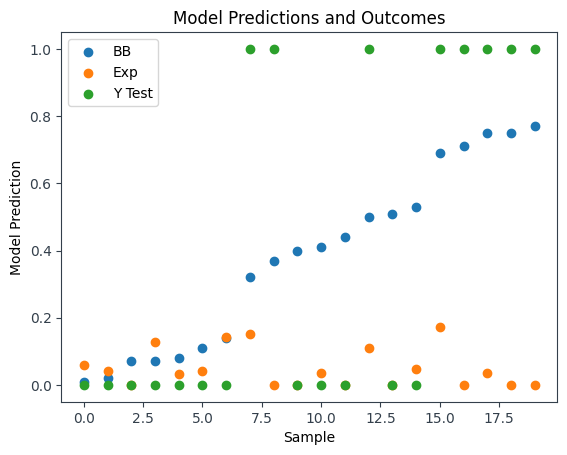

In [16]:
Diabetes_Stats.Class_Fidelity_Graph()